# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [4]:
tab = pd.crosstab(df['sex'], df['flag_doente'], margins= True)
tab = (tab
       .assign(média_doentes=tab[1].mean())
       .assign(odds=tab[1] / tab[0])
)
tab = (tab
       .assign(odds_ratio = tab['odds']/(tab.loc[1.0,'odds']))
       .assign(logito = np.log(tab['odds']))
)
tab = tab.assign(WOE = np.log(tab['odds_ratio']))
tab

flag_doente,0,1,All,média_doentes,odds,odds_ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,92.666667,0.347222,0.280214,-1.057790,-1.272200
1.0,92,114,206,92.666667,1.239130,1.000000,0.214410,0.000000
All,164,139,303,92.666667,0.847561,0.683997,-0.165392,-0.379802


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [5]:
# Antes de criar a bivariada, iremos categorizar a variável idade.
bins = [29, 40, 50, 60, 70, 80]  # Define os limites dos intervalos para os grupos
# Definindo os rótulos para os grupos
labels = ['até_40', '40_50', '50_60', '60_70', '70_80']
# Categorizando a coluna 'idade' em grupos
df['grupo_idade'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [7]:
tab_age = pd.crosstab(df['grupo_idade'], df['flag_doente'], margins= True)
tab_age = (tab_age
       .assign(média_doentes=tab_age[1].mean())
       .assign(odds=tab_age[1] / tab_age[0])
)
tab_age = (tab_age
       .assign(odds_ratio = tab_age['odds']/(tab_age.loc['60_70','odds']))
       .assign(logito = np.log(tab_age['odds']))
)
tab_age = tab_age.assign(WOE = np.log(tab_age['odds_ratio']))
tab_age['média_idade'] = df['age'].mean()
tab_age

flag_doente,0,1,All,média_doentes,odds,odds_ratio,logito,WOE,média_idade
grupo_idade,,,,,,,,,
até_40,11,4,15,46.333333,0.363636,0.237477,-1.011601,-1.437685,54.438944
40_50,50,22,72,46.333333,0.440000,0.287347,-0.820981,-1.247065,54.438944
50_60,65,60,125,46.333333,0.923077,0.602826,-0.080043,-0.506127,54.438944
60_70,32,49,81,46.333333,1.531250,1.000000,0.426084,0.000000,54.438944
70_80,6,4,10,46.333333,0.666667,0.435374,-0.405465,-0.831550,54.438944
All,164,139,303,46.333333,0.847561,0.553509,-0.165392,-0.591477,54.438944


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

c:\Users\samsun\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\samsun\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\samsun\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\samsun\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na 

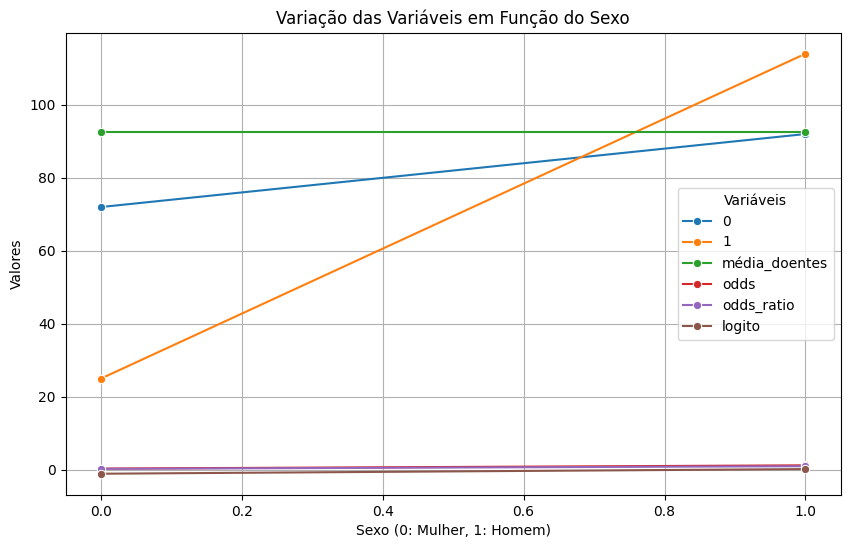

In [17]:
# Removendo a linha 'All' do DataFrame para evitar sua inclusão no gráfico
tab = tab[tab['sex'] != 'All']

# Definindo as variáveis que serão usadas no lineplot
variaveis = [0, 1, 'média_doentes', 'odds', 'odds_ratio', 'logito']

# Criando o lineplot usando Seaborn com as variáveis em relação ao sexo
plt.figure(figsize=(10, 6))
for var in variaveis:
    sns.lineplot(data=tab, x='sex', y=var, marker='o', label=var)

# Adicionando título e rótulos aos eixos
plt.title('Variação das Variáveis em Função do Sexo')
plt.xlabel('Sexo (0: Mulher, 1: Homem)')
plt.ylabel('Valores')

# Exibindo o gráfico
plt.grid(True)
plt.legend(title='Variáveis')
plt.show()